In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Task No 1: Download the dataset

In [2]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

# Task No 2: Check the Size and Plot the Images

In [8]:
trainX.shape

(60000, 28, 28)

In [9]:
trainX[0]

(28, 28)

In [4]:
trainY.shape

(60000,)

In [5]:
testX.shape

(10000, 28, 28)

In [6]:
testY.shape

(10000,)

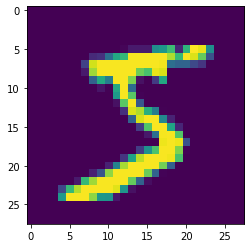

In [12]:
plt.imshow(trainX[0])

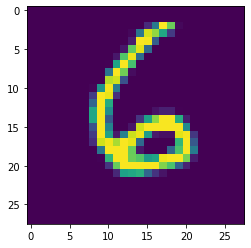

In [16]:
plt.imshow(testX[600])

# Task No 3: Apply on hot encosing, float conversion and normalization

one hot encodder is used to convert categorical data into 0 and 1, as this is image, we can not apply this technique on it as its not a dataframe. we can only apply float conversion and normalization

In [21]:
trainX=trainX.astype('float32')
testX=testX.astype('float32')

In [22]:
trainX=trainX/255.0
testX=testX/255.0

# Task No 4: Define Model

In [25]:
model= tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax')])

# Task No 5: set Parameters

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Task No 6: Run model

In [38]:
history=model.fit(trainX, trainY, epochs=20, validation_data=(testX,testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.1520 - val_accuracy: 0.9760
Epoch 2/20
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1575 - val_accuracy: 0.9753
Epoch 3/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.1496 - val_accuracy: 0.9757
Epoch 4/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.1650 - val_accuracy: 0.9744
Epoch 5/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.1471 - val_accuracy: 0.9770
Epoch 6/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1823 - val_accuracy: 0.9750
Epoch 7/20
60000/60000 [==============================] 

In [39]:
model.evaluate(testX,testY)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.2035 - accuracy: 0.9750


[0.2034617082988576, 0.975]

<function matplotlib.pyplot.show(*args, **kw)>

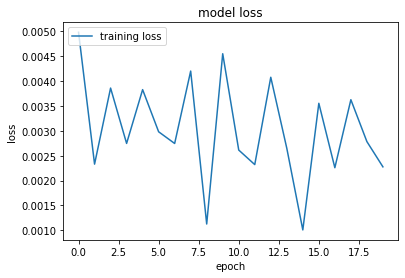

In [45]:
plt.plot(history.history['loss'])
plt.title("model loss")
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['training loss'], loc='upper left')
plt.show

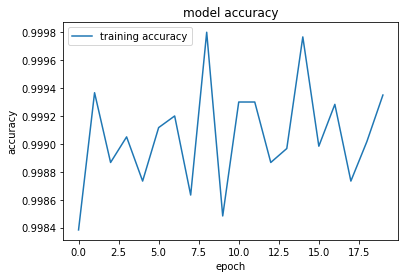

In [47]:
plt.plot(history.history['accuracy'])
plt.title("model accuracy")
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.legend(['training accuracy'], loc='upper left')
plt.show()

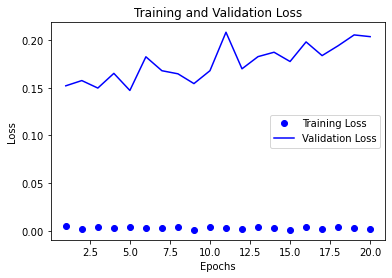

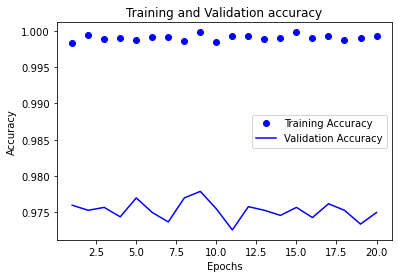

<Figure size 432x288 with 0 Axes>

In [49]:
history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()

# Task No 7: Repeat Step 4 again and again

In [30]:
model= tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(32, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(trainX, trainY, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 11665.8964 - accuracy: 5.0000e-05
Epoch 2/20
60000/60000 [==============================] - 3s 49us/sample - loss: 29273.8880 - accuracy: 0.0000e+00
Epoch 3/20
60000/60000 [==============================] - 3s 54us/sample - loss: 39397.4796 - accuracy: 0.0000e+00
Epoch 4/20
60000/60000 [==============================] - 3s 52us/sample - loss: 45098.5300 - accuracy: 0.0000e+00
Epoch 5/20
60000/60000 [==============================] - 3s 49us/sample - loss: 48184.9852 - accuracy: 0.0000e+00
Epoch 6/20
60000/60000 [==============================] - 3s 51us/sample - loss: 52784.9153 - accuracy: 0.0000e+00
Epoch 7/20
60000/60000 [==============================] - 3s 48us/sample - loss: 58852.4888 - accuracy: 0.0000e+00
Epoch 8/20
60000/60000 [==============================] - 3s 53us/sample - loss: 64586.3961 - accuracy: 0.0000e+00
Epoch 9/20
60000/60000 [==============================] -

In [31]:
model.evaluate(testX,testY)

10000/10000 [==============================] - 0s 42us/sample - loss: 93828.7910 - accuracy: 0.0000e+00


[93828.79105, 0.0]

# Result: zero accuracy by changing sparse_categorical_crossentropy to just categorical_crossentropy and by reducing nodes from 128 to 32

In [32]:
model= tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(32, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(trainX, trainY, epochs=20)

model.evaluate(testX,testY)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3529 - accuracy: 0.9020
Epoch 2/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1940 - accuracy: 0.9442
Epoch 3/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1554 - accuracy: 0.9542
Epoch 4/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1329 - accuracy: 0.9607
Epoch 5/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1176 - accuracy: 0.9648
Epoch 6/20
60000/60000 [==============================] - 4s 58us/sample - loss: 0.1050 - accuracy: 0.9681
Epoch 7/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0954 - accuracy: 0.9710
Epoch 8/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0877 - accuracy: 0.9735
Epoch 9/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0816 - accuracy: 0.9747
Epoch 10/20
60

[0.1342142194809392, 0.9665]

# Result: by reducing to 32 filters from 128, result also reduced to 97% from 98%

In [33]:
model= tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(trainX, trainY, epochs=20)

model.evaluate(testX,testY)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3016 - accuracy: 0.9153
Epoch 2/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1443 - accuracy: 0.9581
Epoch 3/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1042 - accuracy: 0.9683
Epoch 4/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0814 - accuracy: 0.9752
Epoch 5/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0664 - accuracy: 0.9793
Epoch 6/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0565 - accuracy: 0.9822
Epoch 7/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0490 - accuracy: 0.9846
Epoch 8/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0419 - accuracy: 0.9872
Epoch 9/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0359 - accuracy: 0.9886
Epoch 10/20
60

[0.1199531145590543, 0.9745]

# Result: by reducing to 64 filters from 128, result also reduced to 97.45% from 97.77%

In [51]:
model= tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(trainX, trainY, epochs=16, validation_data=(testX,testY))

Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2253 - accuracy: 0.9342 - val_loss: 0.1148 - val_accuracy: 0.9669
Epoch 2/16
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0933 - accuracy: 0.9719 - val_loss: 0.0865 - val_accuracy: 0.9736
Epoch 3/16
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0603 - accuracy: 0.9809 - val_loss: 0.0770 - val_accuracy: 0.9746
Epoch 4/16
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.0682 - val_accuracy: 0.9805
Epoch 5/16
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0732 - val_accuracy: 0.9785
Epoch 6/16
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0245 - accuracy: 0.9923 - val_loss: 0.0708 - val_accuracy: 0.9781
Epoch 7/16
60000/60000 [==============================] 

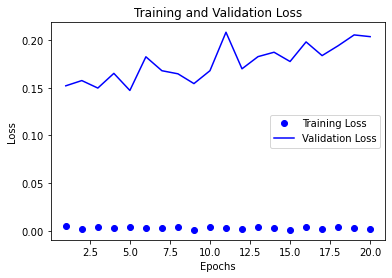

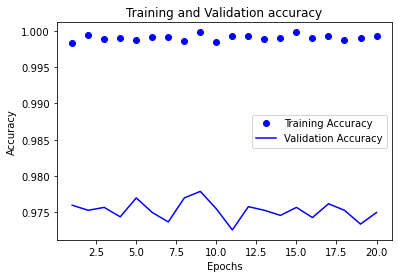

<Figure size 432x288 with 0 Axes>

In [52]:
history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()

# Final Remarks: after making changes in the model, the result is that we can increase the accuracy of model by increasing number of filters/ nodes and reducing the epochs from 20 to 16, as its the the point from either way, accuracy is decreasing.